In [45]:
# !pip install venny4py
import pandas as pd
from venny4py.venny4py import *

subset = ['ChrID', 'start', 'end', 'width', 'ABF1|ABF2|ABF3|ABF4']
def get_unique_rows(species):
    df_original = pd.read_csv(f'{species}ABFs_DAP-Seq_peaks.csv')
    print(f'number of original rows for {species}: {len(df_original)}')
    
    redundant_df = df_original[df_original.duplicated(subset=subset, keep=False)]
    print(f'number of redundant rows for {species}: {len(redundant_df)}')
    redundant_df.to_csv(f'redundant_{species}ABFs_DAP-Seq_peaks.csv', index=False)
    
    redundant_df = df_original[df_original.duplicated(subset=subset)]
    print(f'number of removing redundant rows for {species}: {len(redundant_df)}')
    
    unique_df = df_original[subset].drop_duplicates()
    print(f'number of unique rows for {species}: {len(unique_df)}')
    unique_df.to_csv(f'unique_{species}ABFs_DAP-Seq_peaks.csv', index=False)

    return unique_df

def split(df, species):
    print("Splitting TFs...")
    peak_file = f'{species}ABFs_DAP-Seq_peaks.csv'
    df[['ABF1', 'ABF2', 'ABF3', 'ABF4']] = df['ABF1|ABF2|ABF3|ABF4'].str.split('|', expand=True)

    # Now we need to reshape the dataframe so that each transcription factor (ABF1, ABF2, ABF3, ABF4)
    # gets its own row. We will use `melt` to unpivot the data.
    df_melted = df.melt(id_vars=['ChrID', 'start', 'end', 'width'],
                        value_vars=['ABF1', 'ABF2', 'ABF3', 'ABF4'],
                        var_name='TF', value_name='Replicate Value')
    
    df_melted['Replicate Value'] = df_melted['Replicate Value'].astype(int)
    df_melted = df_melted[df_melted['Replicate Value'] != 0]
    
    per_TF_peak_file = f'PerTF_{peak_file}'
    df_melted.to_csv(per_TF_peak_file, index=False)
    print(f"peak file has been splitted with {len(df_melted)} samples and saved at '{per_TF_peak_file}'")

    return df_melted

def get_venn(df):
    df['id'] = df['ChrID'] + df['start'].astype(str) + df['end'].astype(str)
    ABF1 = df[df['TF']== 'ABF1']['id']
    ABF2 = df[df['TF']== 'ABF2']['id']
    ABF3 = df[df['TF']== 'ABF3']['id']
    ABF4 = df[df['TF']== 'ABF4']['id']
    
    print(f'len(ABF1): {len(ABF1)}')
    print(f'len(ABF2): {len(ABF2)}')
    print(f'len(ABF3): {len(ABF3)}')
    print(f'len(ABF4): {len(ABF4)}')
    
    sets = {
        'ABF1': set(ABF1),
        'ABF2': set(ABF2),
        'ABF3': set(ABF3),
        'ABF4': set(ABF4)
    }
        
    venny4py(sets=sets, colors='crgb')

number of original rows for At: 14454
number of redundant rows for At: 157
number of removing redundant rows for At: 80
number of unique rows for At: 14374
Splitting TFs...
peak file has been splitted with 38356 samples and saved at 'PerTF_AtABFs_DAP-Seq_peaks.csv'
len(ABF1): 6164
len(ABF2): 13005
len(ABF3): 7269
len(ABF4): 11918


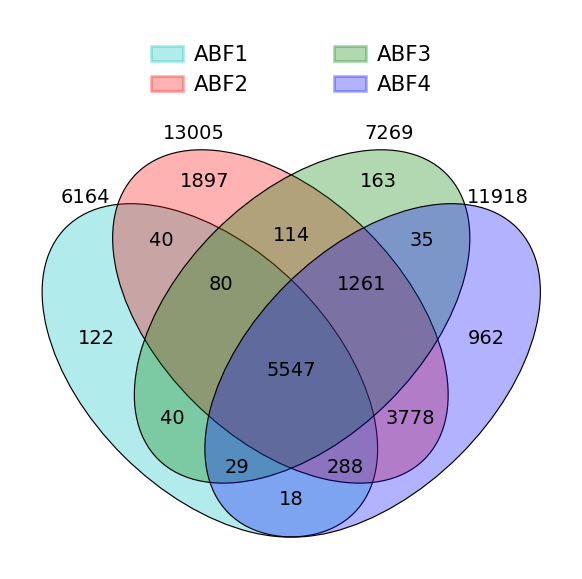

In [46]:
specie = 'At'
unique_df = get_unique_rows(specie)

splitted_df = split(unique_df, specie)
get_venn(splitted_df)

number of original rows for Si: 10600
number of redundant rows for Si: 84
number of removing redundant rows for Si: 42
number of unique rows for Si: 10558
Splitting TFs...
peak file has been splitted with 25299 samples and saved at 'PerTF_SiABFs_DAP-Seq_peaks.csv'
len(ABF1): 1601
len(ABF2): 7969
len(ABF3): 8004
len(ABF4): 7725


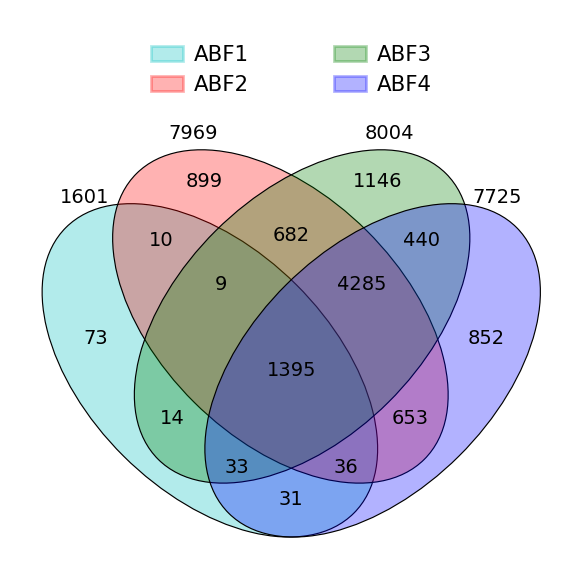

In [47]:
specie = 'Si'
unique_df = get_unique_rows(specie)

splitted_df = split(unique_df, specie)
get_venn(splitted_df)